In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan5_6/Assignment/Tuto/'

/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan5_6/Assignment/Tuto


In [ ]:
import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torchvision.transforms as transforms

# reading image
# imsize = [512, 512] if torch.cuda.is_available() else [128, 128] # use small size
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# loader = transforms.Compose([
#     transforms.ToTensor()   
#]) # transform it into a torch tensor

In [ ]:
# computr image gradient (using Sobel operator)
def gradient_img(img):
    img = img.squeeze(0)
    ten = torch.unbind(img) # Removes a tensor dimension.
# Returns a tuple of all slices along a given dimension, already without it.
    x = ten[0].unsqueeze(0).unsqueeze(0)

    a = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) # sobel operator: x axis
    conv1 = nn.Conv2d(1, 1, kernel_size = 3, stride = 1, padding = 1, bias = False)
    conv1.weight = nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
    G_x = conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

    b = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) # sobel operator: y axis
    conv2 = nn.Conv2d(1, 1, kernel_size = 3, stride = 1, padding = 1, bias = False)
    conv2.weight = nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
    G_y = conv2(Variable(x)).data.view(1, x.shape[2], x.shape[3])

    G = torch.sqrt(torch.pow(G_x,2) + torch.pow(G_y,2))
    return G

In [ ]:
import os
curent = os.getcwd()
print(curent)

/content/drive/MyDrive/HUST GIFTED CLASS K66/IPSAL LAB/Computer vision/Slides/Tuan5_6/Assignment/Tuto


In [ ]:
import torchvision.transforms.functional as TF
from PIL import Image
# image = Image.open(image_path)
path = curent + '/images/HUST.jpg'
image_PIL = Image.open(path)
image_ts_PIL = TF.to_tensor(image_PIL)

In [ ]:
image_ts_PIL.size()

torch.Size([3, 170, 302])

In [ ]:
grad = gradient_img(image_ts_PIL)

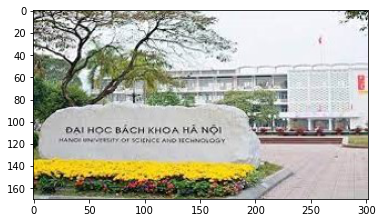

In [ ]:
plt.imshow(image_ts_PIL.permute(1,2,0));

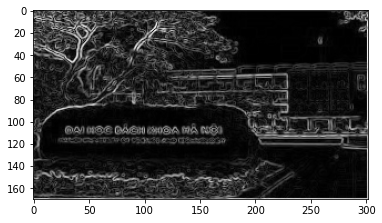

In [ ]:
plt.imshow(grad.squeeze(0), cmap = 'gray');

In [ ]:
import torchvision.transforms.functional as TF
from PIL import Image
path = curent + '/images/Fourier.jpg'
image_PIL = Image.open(path)
image_ts_PIL = TF.to_tensor(image_PIL)
grad = gradient_img(image_ts_PIL)

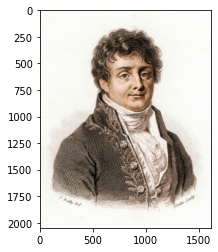

In [ ]:
plt.imshow(image_ts_PIL.permute(1,2,0));

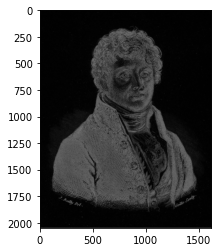

In [ ]:
plt.imshow(grad.permute(1,2,0)[:,:,0], cmap = 'gray');

In [ ]:
path = curent + '/images/cameraman.png'
image_PIL = Image.open(path).convert('RGB')
image_ts_PIL = TF.to_tensor(image_PIL)
image_ts_PIL.size()

torch.Size([3, 256, 256])

In [ ]:
print(image_ts_PIL[0,:,:])

tensor([[0.6118, 0.6235, 0.6196,  ..., 0.5922, 0.5961, 0.5961],
        [0.6275, 0.6039, 0.6157,  ..., 0.6039, 0.6078, 0.6000],
        [0.6118, 0.6235, 0.6196,  ..., 0.5922, 0.5961, 0.5961],
        ...,
        [0.4471, 0.5176, 0.4824,  ..., 0.5294, 0.5373, 0.4471],
        [0.4745, 0.4941, 0.5098,  ..., 0.5216, 0.5098, 0.4431],
        [0.4745, 0.4941, 0.5098,  ..., 0.5216, 0.5098, 0.4431]])


In [ ]:
print(image_ts_PIL[1,:,:])

tensor([[0.6118, 0.6235, 0.6196,  ..., 0.5922, 0.5961, 0.5961],
        [0.6275, 0.6039, 0.6157,  ..., 0.6039, 0.6078, 0.6000],
        [0.6118, 0.6235, 0.6196,  ..., 0.5922, 0.5961, 0.5961],
        ...,
        [0.4471, 0.5176, 0.4824,  ..., 0.5294, 0.5373, 0.4471],
        [0.4745, 0.4941, 0.5098,  ..., 0.5216, 0.5098, 0.4431],
        [0.4745, 0.4941, 0.5098,  ..., 0.5216, 0.5098, 0.4431]])


In [ ]:
print(image_ts_PIL[2,:,:])

tensor([[0.6118, 0.6235, 0.6196,  ..., 0.5922, 0.5961, 0.5961],
        [0.6275, 0.6039, 0.6157,  ..., 0.6039, 0.6078, 0.6000],
        [0.6118, 0.6235, 0.6196,  ..., 0.5922, 0.5961, 0.5961],
        ...,
        [0.4471, 0.5176, 0.4824,  ..., 0.5294, 0.5373, 0.4471],
        [0.4745, 0.4941, 0.5098,  ..., 0.5216, 0.5098, 0.4431],
        [0.4745, 0.4941, 0.5098,  ..., 0.5216, 0.5098, 0.4431]])


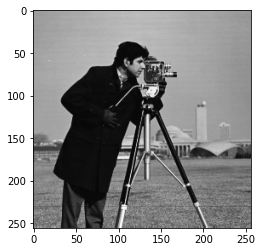

In [ ]:
plt.imshow(image_ts_PIL.permute(1,2,0));

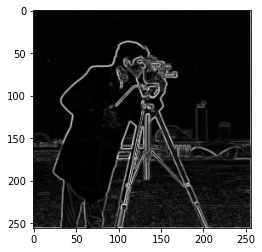

In [ ]:
grad = gradient_img(image_ts_PIL)
plt.imshow(grad.permute(1,2,0)[:,:,0], cmap = 'gray');

# Quan sat theo tung lenh cua ham image_gradient

### Anh dau vao f(x,y)

In [ ]:
image_PIL = Image.open(path).convert('RGB')
image_ts_PIL = TF.to_tensor(image_PIL)

img = image_ts_PIL
img.size()

torch.Size([3, 256, 256])

In [ ]:
img = img.squeeze(0)
img.size()

torch.Size([3, 256, 256])

In [ ]:
ten = torch.unbind(img)
print(ten[0])

tensor([[0.6118, 0.6235, 0.6196,  ..., 0.5922, 0.5961, 0.5961],
        [0.6275, 0.6039, 0.6157,  ..., 0.6039, 0.6078, 0.6000],
        [0.6118, 0.6235, 0.6196,  ..., 0.5922, 0.5961, 0.5961],
        ...,
        [0.4471, 0.5176, 0.4824,  ..., 0.5294, 0.5373, 0.4471],
        [0.4745, 0.4941, 0.5098,  ..., 0.5216, 0.5098, 0.4431],
        [0.4745, 0.4941, 0.5098,  ..., 0.5216, 0.5098, 0.4431]])


In [ ]:
print(ten[0].size(),ten[1].size(),ten[2].size())

torch.Size([256, 256]) torch.Size([256, 256]) torch.Size([256, 256])


In [ ]:
x=ten[0].unsqueeze(0).unsqueeze(0)
x.shape

torch.Size([1, 1, 256, 256])

## Tinh gradient theo cac truc

### Tinh gradient theo truc x: Gx = (df/dx)*G

In [ ]:
a = np.array([[1,0,-1], [1,0,-1], [1,0,-1]]) # a = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
conv1 = nn.Conv2d(1, 1, kernel_size = 3, stride = 1, padding=1, bias = False)
conv1.weight = nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x = conv1(Variable(x)).data.view(1, x.shape[2], x.shape[3])

In [ ]:
a

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [ ]:
conv1.weight

Parameter containing:
tensor([[[[ 1.,  0., -1.],
          [ 1.,  0., -1.],
          [ 1.,  0., -1.]]]], requires_grad=True)

In [ ]:
G_x.shape

torch.Size([1, 256, 256])

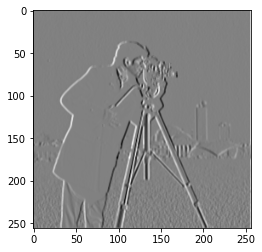

In [ ]:
plt.imshow(G_x.permute(1,2,0)[:,:,0], cmap = 'gray');

### Tinh gradient theo truc y: Gy = (df/dy)*G

In [ ]:
b=np.array([[1, 1, 1],[0,0,0],[-1,-1,-1]]) # b=np.array([[1, 1, 1],[0,0,0],[-1,-1,-1]])
conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

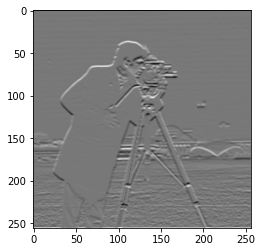

In [ ]:
plt.imshow(G_y.permute(1,2,0)[:,:,0], cmap = 'gray');

### Tinh gradient magnitude

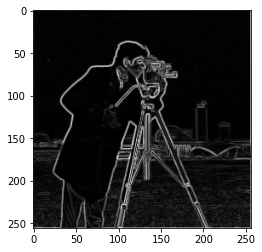

In [ ]:
G = torch.sqrt(G_x**2+G_y**2)
plt.imshow(G.squeeze(), cmap = 'gray')

## Thu anh khac

In [68]:
path = curent + '/images/doraemon.png'
image_PIL = Image.open(path).convert('RGB')
image_ts_PIL = TF.to_tensor(image_PIL)

img = image_ts_PIL
img.size()

torch.Size([3, 243, 208])

In [69]:
img = img.squeeze(0)
ten=torch.unbind(img)#Removes a tensor dimension. Returns a tuple of all slices along a given dimension
x=ten[0].unsqueeze(0).unsqueeze(0)
    
a=np.array([[1, 0, -1],[1,0,-1],[1,0,-1]]) # a=np.array([[1, 0, -1],[1,0,-1],[1,0,-1]])
conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

b=np.array([[1, 1, 1],[0,0,0],[-1,-1,-1]]) # b=np.array([[1, 1, 1],[0,0,0],[-1,-1,-1]])
conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
Gx_1=G_x
Gy_1=G_y
G_1=G

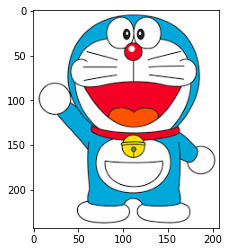

In [74]:
plt.imshow(img.permute(1,2,0))

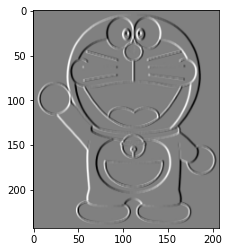

In [70]:
plt.imshow(G_x.squeeze(), cmap = 'gray')

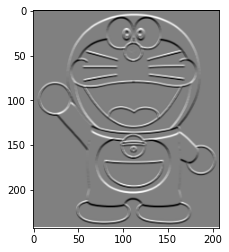

In [71]:
plt.imshow(G_y.permute(1,2,0)[:,:,0], cmap = 'gray')

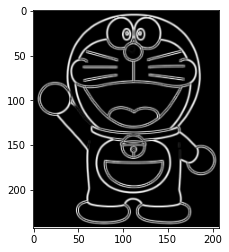

In [72]:
plt.imshow(G.permute(1,2,0)[:,:,0], cmap = 'gray')

In [75]:
img = img.squeeze(0)
ten=torch.unbind(img)#Removes a tensor dimension. Returns a tuple of all slices along a given dimension
# x=ten[0].unsqueeze(0).unsqueeze(0) #
x=ten[1].unsqueeze(0).unsqueeze(0) # thử xem lấy kênh 2 xem khác gì không?

a=np.array([[1, 0, -1],[1,0,-1],[1,0,-1]])
conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

b=np.array([[1, 1, 1],[0,0,0],[-1,-1,-1]])
conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
Gx_2=G_x
Gy_2=G_y
G_2=G

In [76]:
img = img.squeeze(0)
ten=torch.unbind(img)#Removes a tensor dimension. Returns a tuple of all slices along a given dimension
# x=ten[0].unsqueeze(0).unsqueeze(0) #   
x=ten[2].unsqueeze(0).unsqueeze(0) # thử xem lấy kênh 3 xem khác gì không?

a=np.array([[1, 0, -1],[1,0,-1],[1,0,-1]])
conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

b=np.array([[1, 1, 1],[0,0,0],[-1,-1,-1]])
conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
Gx_3=G_x
Gy_3=G_y
G_3=G

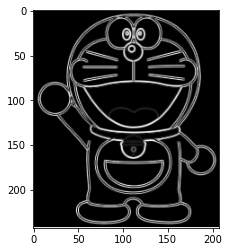

In [77]:
plt.imshow(G.permute(1,2,0)[:,:,0], cmap = 'gray')

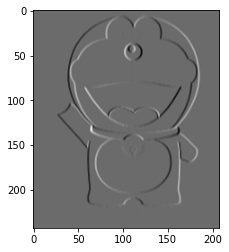

In [78]:
plt.imshow((Gx_2-Gx_1).permute(1,2,0)[:,:,0],cmap='gray')

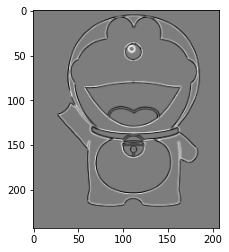

In [79]:
plt.imshow((G_3-G_1).permute(1,2,0)[:,:,0],cmap='gray')

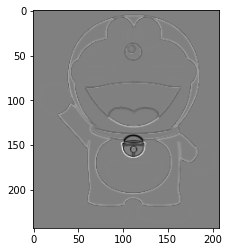

In [80]:
plt.imshow((G_3-G_2).permute(1,2,0)[:,:,0],cmap='gray')

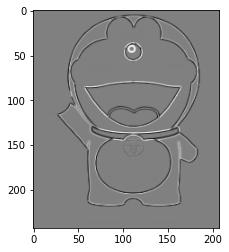

In [81]:
plt.imshow((G_2-G_1).permute(1,2,0)[:,:,0],cmap='gray')